<a href="https://colab.research.google.com/github/AllanKDeveloper/dio-dimensionality-reduction-ml/blob/main/Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resized Original Image (300x300):


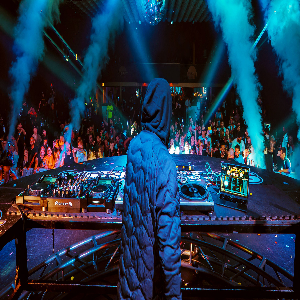

Grayscale Image:


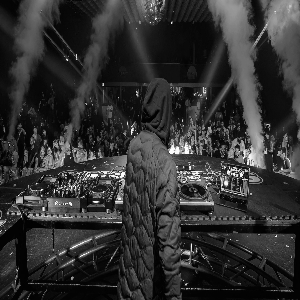

Binary Image:


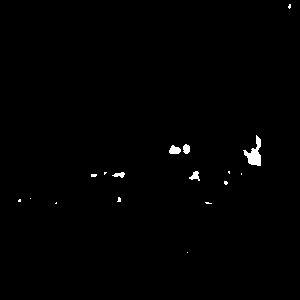

Combined Result:


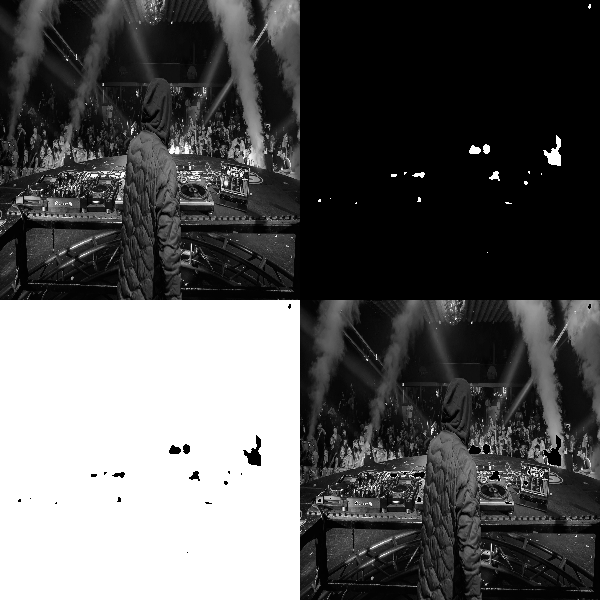

In [7]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow
from io import BytesIO
from PIL import Image

# Image URL
url = 'https://cdn.sanity.io/images/4z8uxx4p/production/880447033161ab7a1b60321e585a44eb5f884b90-3840x2160.jpg'

# Download the image and convert it to a NumPy array
response = requests.get(url)
img_array = np.array(Image.open(BytesIO(response.content)))

# Convert the image to BGR format (OpenCV compatible)
colored_image = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)

# Resize the original image to 300x300
colored_image_resized = cv2.resize(colored_image, (300, 300))

# Convert the resized image to grayscale
gray_image = cv2.cvtColor(colored_image_resized, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to smooth the grayscale image
smoothed_image = cv2.GaussianBlur(gray_image, (7, 7), 0)

# Perform binarization (black and white) on the smoothed image
_, binary_image = cv2.threshold(smoothed_image, 160, 255, cv2.THRESH_BINARY)

# Perform inverse binarization
_, inverted_binary_image = cv2.threshold(smoothed_image, 160, 255, cv2.THRESH_BINARY_INV)

# Apply the inverted binary image as a mask on the colored image
masked_image = cv2.bitwise_and(colored_image_resized, colored_image_resized, mask=inverted_binary_image)

# Combine results for display
result = np.vstack([
    np.hstack([gray_image, binary_image]),
    np.hstack([inverted_binary_image, cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)])
])

# Display the resized original image
print("Resized Original Image (300x300):")
cv2_imshow(colored_image_resized)

# Display the grayscale image
print("Grayscale Image:")
cv2_imshow(gray_image)

# Display the binary image
print("Binary Image:")
cv2_imshow(binary_image)

# Display the combined result
print("Combined Result:")
cv2_imshow(result)

cv2.waitKey(0)
cv2.destroyAllWindows()